# Data Project - Stock Market Analysis
Here we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?


Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as numpy
from pandas import DataFrame, Series



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [20]:
import pandas.io as pdweb
import pandas_datareader.data as pdr
from datetime import datetime
from pandas_datareader.data import DataReader

In [6]:
from __future__ import division


In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']


In [10]:
end = pd.datetime.now()

start = datetime(end.year - 1,end.month,end.day)


In [11]:
start

datetime.datetime(2018, 12, 26, 0, 0)

In [21]:
for stock in tech_list:
    globals()[stock]  = DataReader(stock,'yahoo',start,end)

In [24]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300,1039.459961
2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800,1043.880005
2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800,1037.079956
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976


In [25]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,207.695040,204.129802,205.745436,206.122659,2.829955e+07,204.846386
std,33.442285,33.404905,33.424382,33.478474,1.112003e+07,34.126451
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,184.830006,181.897495,183.804996,183.012497,2.097520e+07,181.725746
50%,204.074997,200.739998,202.174995,202.684998,2.588395e+07,201.058792
75%,223.032505,218.902500,221.037498,220.977505,3.227982e+07,220.316059
max,284.890015,282.920013,284.690002,284.269989,9.131220e+07,284.269989


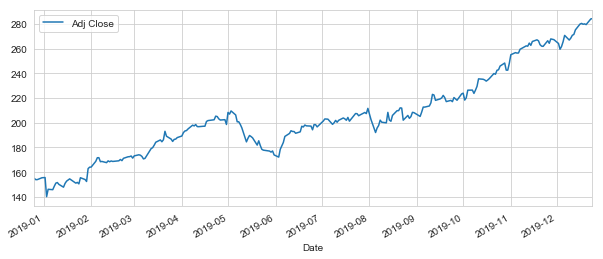

In [26]:
AAPL['Adj Close'].plot(legend= True,figsize=(10,4))

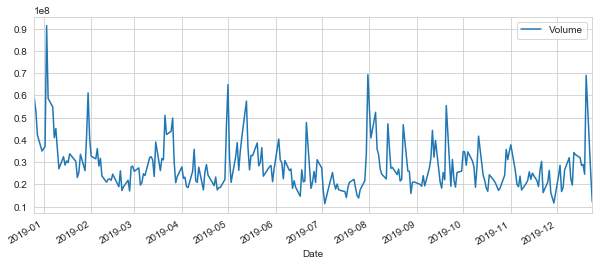

In [27]:
AAPL['Volume'].plot(legend= True,figsize=(10,4))

In [34]:
movingavg_day = [10,20,50]

for ma in movingavg_day:
    column_name = 'MA for %s days'%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

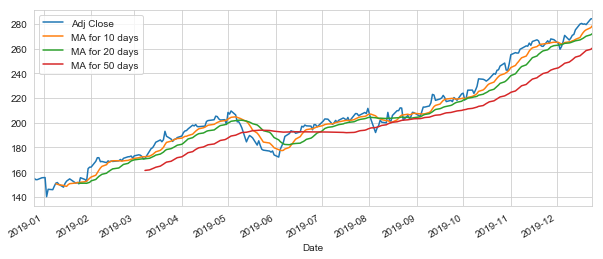

In [36]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

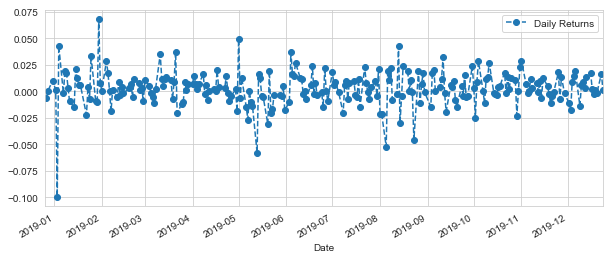

In [38]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Returns'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')